In [1]:
from tensorflow.keras.applications import MobileNetV2, Xception
from tensorflow.keras.layers import Concatenate, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.metrics import SparseCategoricalCrossentropy
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

dic = {0: 'Buras', 1: 'Dangkot', 2: 'Gogos', 3: 'Kapurung', 4: 'Sokko', 5: 'Sop Konro'} 
label_to_class = {v: k for k, v in dic.items()} 

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img 

#Fungsi ensemble predict menggabungkan 3 model
def ensemble_predict(img_path, mobilenetv2_model, xception_model, efficientnetb0_model):
    img = preprocess_image(img_path)
    mobilenetv2_pred = mobilenetv2_model.predict(img)
    xception_pred = xception_model.predict(img)
    efficientnetb0_pred = efficientnetb0_model.predict(img)
    #yolo_model_pred = yolo_model.predict(img)
    final_pred = (mobilenetv2_pred + xception_pred + efficientnetb0_pred) / 3.0  # Average probabilities
    return np.argmax(final_pred, axis=-1) 

#Input model
mobilenetv2_model = load_model(r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Codingan\Model_Skripsi\mobilenetv2_Percobaan 4(2).h5")
xception_model = load_model(r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Codingan\Model_Skripsi\Percobaan3_Xception.h5")
efficientnetb0_model = load_model(r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Codingan\Model_Skripsi\Percobaan3(2)_EfficientNetB0.h5")
#yolo_model = (r"D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\runs\train\yolov7-Makanan12\weights\best.pt")

#def predict_label_ensemble(img_path):
#    pred = ensemble_predict(img_path, mobilenetv2_model, xception_model,efficientnetb0_model)
#    return dic[pred[0]] 

# Evaluasi model
def evaluate_model(test_images, test_labels):
    true_labels = []
    pred_labels = []
    losses = []
    
    for img_path, true_label in zip(test_images, test_labels):
        img = preprocess_image(img_path)
        
        # Calculate predictions
        mobilenetv2_pred = mobilenetv2_model.predict(img)
        xception_pred = xception_model.predict(img)
        efficientnetb0_pred = efficientnetb0_model.predict(img)
        
        final_pred = (mobilenetv2_pred + xception_pred + efficientnetb0_pred) / 3.0  # Average probabilities
        pred_label = np.argmax(final_pred, axis=-1)[0]
        
        true_labels.append(true_label)
        pred_labels.append(pred_label)
        
        # # Convert true_label to one-hot encoding for categorical_crossentropy calculation
        # true_label_onehot = np.zeros((1, len(dic)))
        # true_label_onehot[0, true_label] = 1
        
        # # Calculate loss
        # loss_mobilenetv2 = mobilenetv2_model.evaluate(img, true_label_onehot, verbose=0)[0]
        # loss_xception = xception_model.evaluate(img, true_label_onehot, verbose=0)[0]
        # loss_efficientnetb0 = efficientnetb0_model.evaluate(img, true_label_onehot, verbose=0)[0]
        
        # average_loss = (loss_mobilenetv2 + loss_xception + loss_efficientnetb0) / 3.0
        # losses.append(average_loss)
    
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')
    
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    # print("Average Loss: ", np.mean(losses))
    print("Classification Report:\n", classification_report(true_labels, pred_labels, target_names=list(dic.values())))


test_images = [
    r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Dataset\Buras\BURAS_3.jpg",
    r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Dataset\Dangkot\DANGKOT_7.jpg",
    r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Dataset\Gogos\GOGOS_22.jpg",
    r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Dataset\Kapurung\KAPURUNG_27.jpg",
    r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Dataset\Sokko\SOKKO_6.jpg",
    r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Dataset\Sop Konro\SOP KONRO_188.jpg"
]
test_labels = [
    0,
    1,
    2,
    3,
    4,
    5
]

evaluate_model(test_images, test_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Classification Report:
               precision    recall  f1-score   support

       Buras       1.00      1.00      1.00         1
     Dangkot       1.00      1.00      1.00         1
       Gogos       1.00      1.00      1.00         1
    Kapurung     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


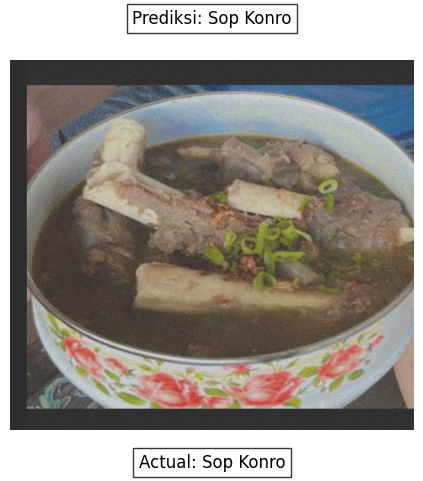

Sop Konro


In [29]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def load_and_display_image_with_labels(img_path, actual_label, predicted_label):
    image = Image.open(img_path)
    
    fig, ax = plt.subplots()
    
    ax.imshow(image)
    ax.axis('off')

    ax.text(0.5, -0.1, f'Actual: {actual_label}', size=12, ha="center", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    ax.text(0.5, 1.1, f'Prediksi: {predicted_label}', size=12, ha="center", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()

# Function to predict label using ensemble of models
def predict_label_ensemble(img_path):
    pred = ensemble_predict(img_path, mobilenetv2_model, xception_model, efficientnetb0_model)
    predicted_label = dic[pred[0]]
    actual_label = os.path.basename(os.path.dirname(img_path))
    load_and_display_image_with_labels(img_path, actual_label, predicted_label)
    return predicted_label

img_path = r"D:\Kuliah Semester 6\Jurnal\Materi\CNN\Split_dataset\test\Sop Konro\SOP KONRO_993.jpg"
print(predict_label_ensemble(img_path))


Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\BURAS_1059.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


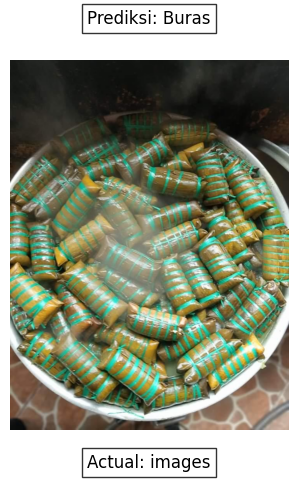

Actual: images, Predicted: Buras
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\BURAS_110.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


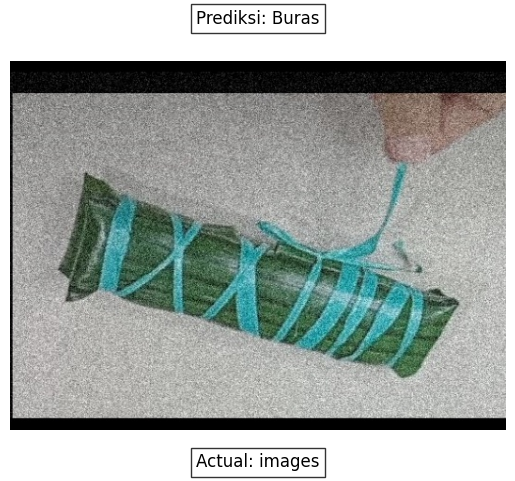

Actual: images, Predicted: Buras
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\BURAS_813.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


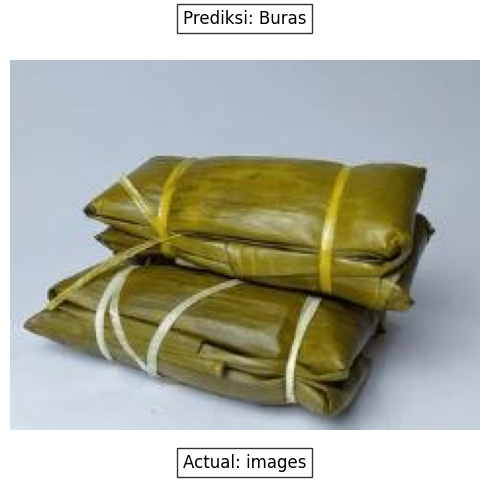

Actual: images, Predicted: Buras
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\BURAS_867.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


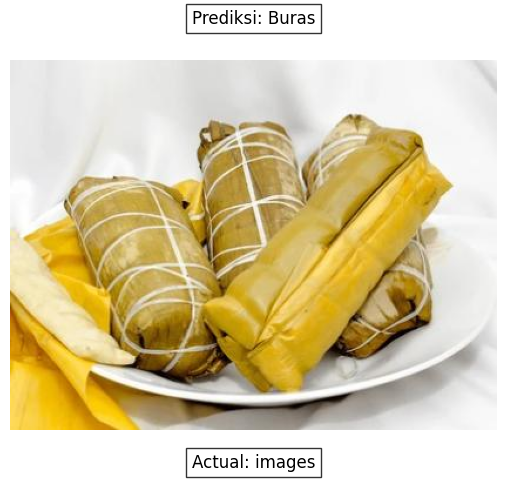

Actual: images, Predicted: Buras
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\DANGKOT_13.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


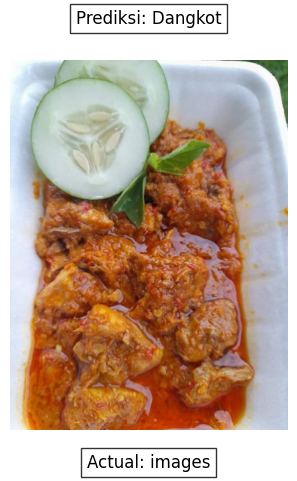

Actual: images, Predicted: Dangkot
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\DANGKOT_4.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


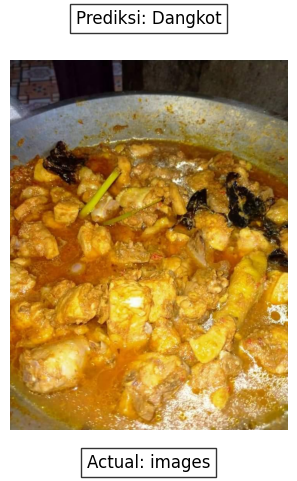

Actual: images, Predicted: Dangkot
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\DANGKOT_741.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


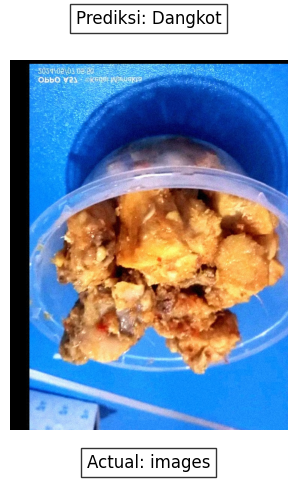

Actual: images, Predicted: Dangkot
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\DANGKOT_892.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


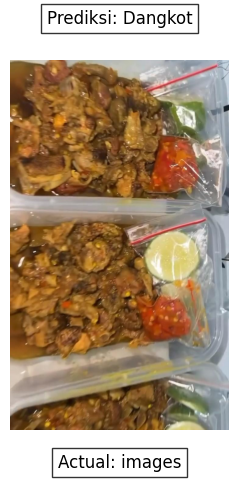

Actual: images, Predicted: Dangkot
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\GOGOS_126.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


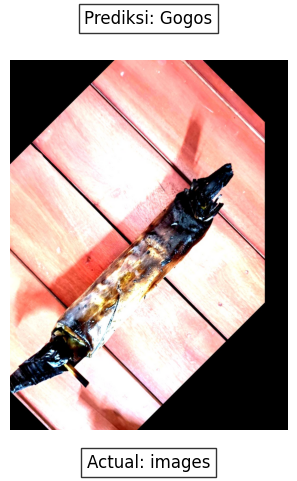

Actual: images, Predicted: Gogos
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\GOGOS_156.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


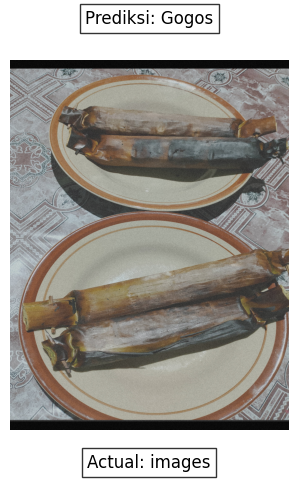

Actual: images, Predicted: Gogos
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\GOGOS_173.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


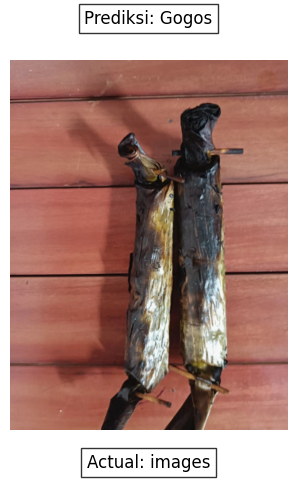

Actual: images, Predicted: Gogos
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\GOGOS_418.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


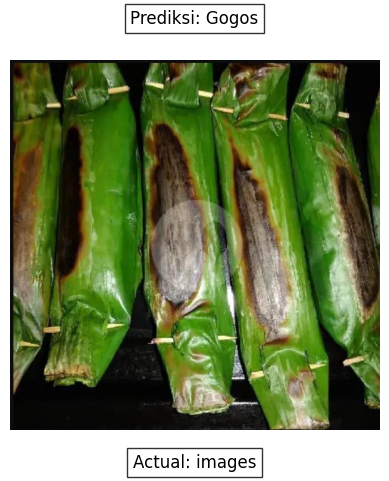

Actual: images, Predicted: Gogos
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\KAPURUNG_1042.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


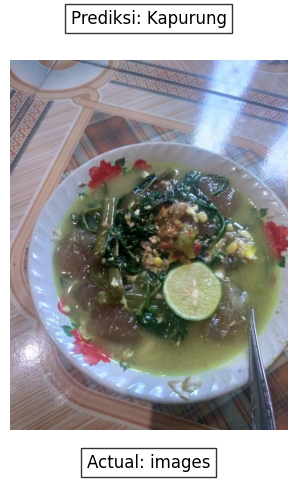

Actual: images, Predicted: Kapurung
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\KAPURUNG_1069.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


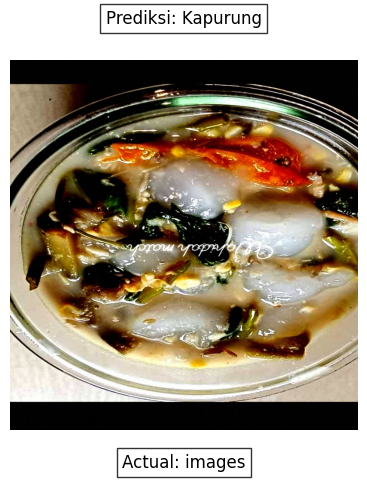

Actual: images, Predicted: Kapurung
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\KAPURUNG_227.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


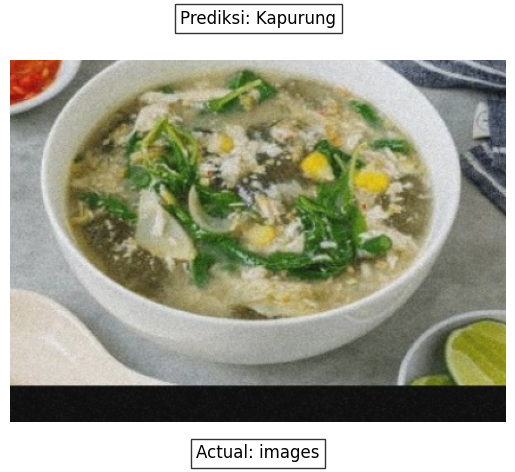

Actual: images, Predicted: Kapurung
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\KAPURUNG_915.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


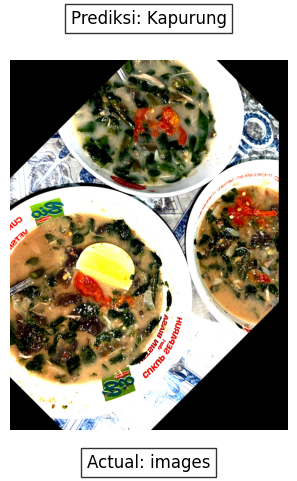

Actual: images, Predicted: Kapurung
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOKKO_169.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


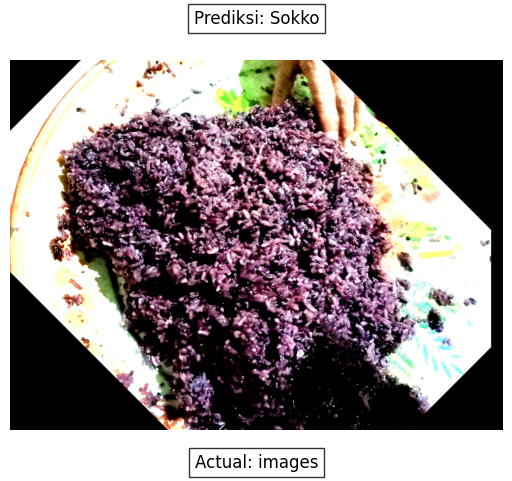

Actual: images, Predicted: Sokko
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOKKO_29.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


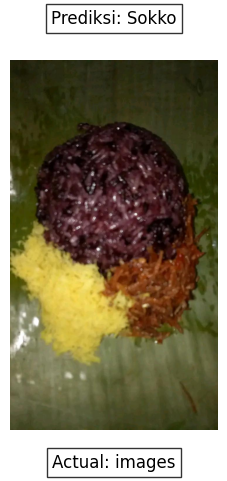

Actual: images, Predicted: Sokko
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOKKO_5.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


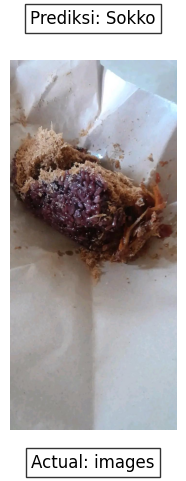

Actual: images, Predicted: Sokko
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOKKO_869.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


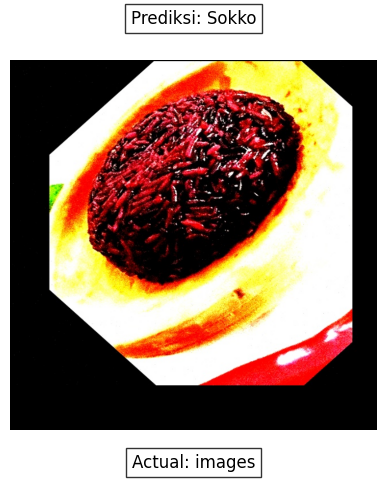

Actual: images, Predicted: Sokko
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOP KONRO_375.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


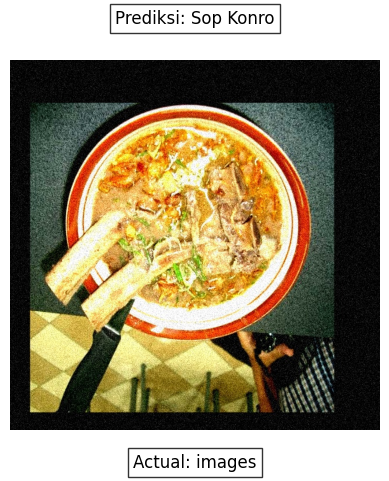

Actual: images, Predicted: Sop Konro
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOP KONRO_38.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


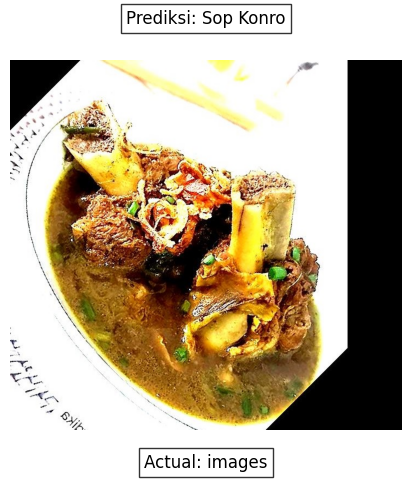

Actual: images, Predicted: Sop Konro
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOP KONRO_572.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


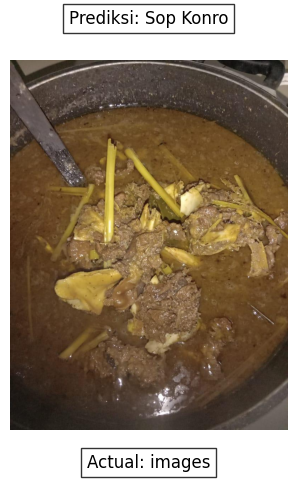

Actual: images, Predicted: Sop Konro
Processing D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images\SOP KONRO_993.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


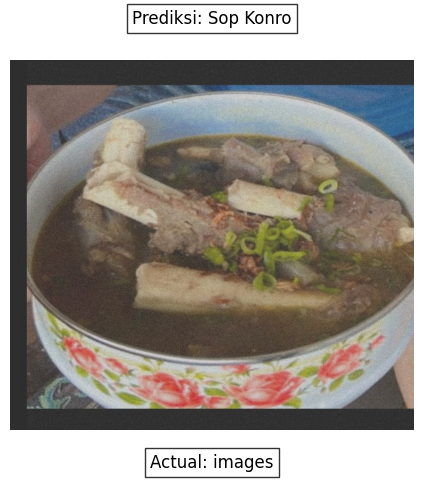

Actual: images, Predicted: Sop Konro
Total detection time: 17.56 seconds


In [31]:
import os
import time
import matplotlib.pyplot as plt
from PIL import Image

def load_and_display_image_with_labels(image_path, actual_label, predicted_label):
    image = Image.open(image_path)
    
    fig, ax = plt.subplots()
    
    ax.imshow(image)
    ax.axis('off')

    ax.text(0.5, -0.1, f'Actual: {actual_label}', size=12, ha="center", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    ax.text(0.5, 1.1, f'Prediksi: {predicted_label}', size=12, ha="center", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()

# Function to predict label using ensemble of models
def predict_label_ensemble(image_path):
    pred = ensemble_predict(image_path, mobilenetv2_model, xception_model, efficientnetb0_model)
    predicted_label = dic[pred[0]]
    actual_label = os.path.basename(os.path.dirname(image_path))
    load_and_display_image_with_labels(image_path, actual_label, predicted_label)
    return predicted_label

# Function to process all images in a folder
def process_images_in_folder(folder_path):
    start_time = time.time()
    
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_path = os.path.join(subdir, file)
                print(f'Processing {image_path}...')
                predicted_label = predict_label_ensemble(image_path)
                print(f'Actual: {os.path.basename(subdir)}, Predicted: {predicted_label}')
    
    end_time = time.time()
    total_time = end_time - start_time
    print(f'Total detection time: {total_time:.2f} seconds')

folder_path = r"D:\Kuliah Semester 6\Jurnal\Materi\Modul1\yolo7-cpu\inference\images"
process_images_in_folder(folder_path)
